# Case Background & Key Questions	

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of his years’ survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1)  How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
 												 								
2)  Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous illness, etc.)?	
						 						
To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`. Below you will find a list of steps/questions that you will need to take in your investigation. The first part of the notebook will be focused on cleaning up your data and visualizing it.  The second part of the data set will be focused on performing statistical tests to make statements with statistical significance.  


Before you begin writing your code to clean up this data in Pandas, I encourage you to watch the following video that explains the most efficient way to clean data in pandas.

https://www.youtube.com/watch?v=nxWginnBklU&feature=youtu.be

Also, here is a link to his notebook of sample code.  
https://gitlab.com/cheevahagadog/talks-demos-n-such/tree/master/PyGotham2019

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


# pd.read_csv('case_study.csv')

In [257]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (171) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [258]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,88.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [259]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

In [260]:
df['PHYSHLTH'].value_counts()

88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [261]:
df['_STATE'].value_counts()

36.0    12249
34.0    11708
9.0     10588
Name: _STATE, dtype: int64

In [262]:
pd.set_option('display.max_columns', 360)


In [263]:
# your code here
df = df[df['_STATE'].isin([9,34,36])]

Now check to see how large our subset df.

In [264]:
df.shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code.

In [265]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [266]:
print(df['PHYSHLTH'].value_counts())
print(df['PHYSHLTH'].isna().sum())



88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64
0


In [267]:
#your code here
df['PHYSHLTH'] = df['PHYSHLTH'].replace([88],0)
df['PHYSHLTH'].value_counts()


0.0     21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

In [268]:
df['PHYSHLTH'] = df['PHYSHLTH'].replace([77],None)
df['PHYSHLTH'] = df['PHYSHLTH'].replace([99],None)
df.dropna(axis=0,subset=['PHYSHLTH'], inplace=True)
df['PHYSHLTH'].value_counts()


0.0     21801
30.0     2498
2.0      2056
1.0      1561
3.0      1220
5.0      1115
10.0      766
7.0       658
15.0      658
4.0       637
20.0      410
14.0      330
6.0       193
25.0      162
8.0       102
21.0       70
12.0       69
28.0       59
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a graph shows the distribution of the data.

In [269]:
# descriptive statistics
df['PHYSHLTH'].describe()


count    34545.000000
mean         4.082704
std          8.511923
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

Text(0, 0.5, 'Days Sick')

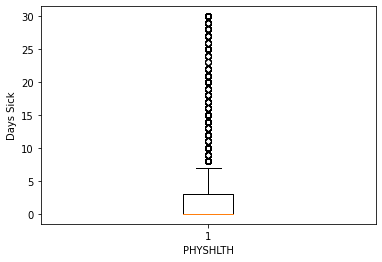

In [270]:
#generate a graph that quickly shows those statistics
import matplotlib.pyplot as plt
from pylab import *
fig = plt.figure()

ax = fig.add_subplot(111)
ax.boxplot(df['PHYSHLTH'])
ax.set_xlabel('PHYSHLTH')
ax.set_ylabel('Days Sick')



In [271]:
df['PHYSHLTH'].index

Int64Index([ 49938,  49939,  49940,  49941,  49942,  49943,  49944,  49945,
             49946,  49947,
            ...
            303769, 303770, 303771, 303772, 303773, 303774, 303775, 303776,
            303777, 303778],
           dtype='int64', length=34545)

Text(0, 0.5, '# of Observations')

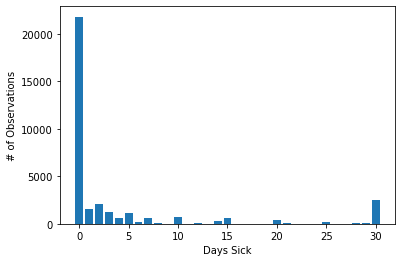

In [272]:
fig, ax = plt.subplots()
x = df['PHYSHLTH'].value_counts().index
y = df['PHYSHLTH'].value_counts().values
plt.bar(x,y)
ax.set_xlabel('Days Sick')
ax.set_ylabel('# of Observations')


Text(0, 0.5, '# of Observations')

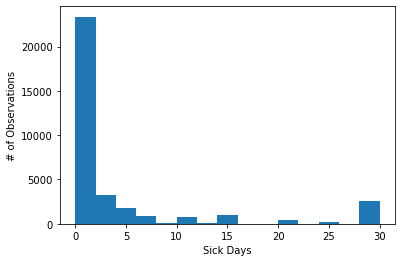

In [273]:
fig, ax = plt.subplots()
x = df['PHYSHLTH']
plt.hist(x,bins=15)
ax.set_xlabel('Sick Days')
ax.set_ylabel('# of Observations')

In [274]:
# graph the distribution of data


## 3. Generate a graphic that compares the average number of sick days for each state. 

In [275]:
# code to calculate the average number of sick days by state

df.groupby(['_STATE'])['PHYSHLTH'].mean()

_STATE
9.0     3.696732
34.0    4.366502
36.0    4.145073
Name: PHYSHLTH, dtype: float64

Text(0, 0.5, 'Days Sick')

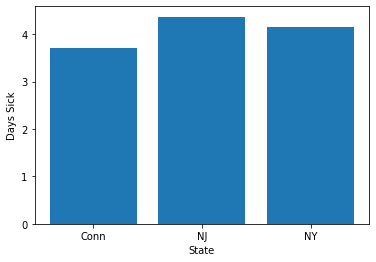

In [276]:
fig, ax = plt.subplots()
x = ['Conn', 'NJ', 'NY']
y = df.groupby(['_STATE'])['PHYSHLTH'].mean().values
plt.bar(x,y)
ax.set_xlabel('State')
ax.set_ylabel('Days Sick')

In [277]:
# code to graph those averages using matplotlib


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


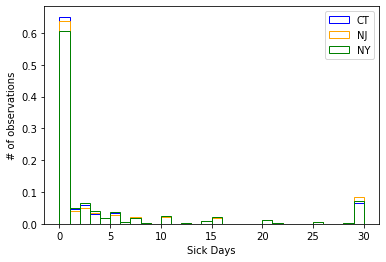

In [278]:
ct = df.where(df['_STATE']==9)
nj = df.where(df['_STATE']==34)
ny = df.where(df['_STATE']==36)
fig, ax = plt.subplots()
plt.hist(ct['PHYSHLTH'], bins=30, label = 'CT', edgecolor = 'blue', density = True, facecolor = 'None')
plt.hist(nj['PHYSHLTH'], bins = 30, label = 'NJ', edgecolor = 'orange', density = True, facecolor = 'None')
plt.hist(ny['PHYSHLTH'], bins =30, label = 'NY', edgecolor = 'green', density = True, facecolor = 'None')
ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')
ax.legend(loc ='best')

In [279]:
# graphic showing the histogram of data



## 4. Turn the number of sick days into a classification of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [280]:
# code to create new colum for chronically sick

df['Chronic'] = np.where(df['PHYSHLTH']>10, 1, 0)
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,Chronic
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,0.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [281]:
df.groupby(['_STATE'])['Chronic'].mean()

_STATE
9.0     0.114847
34.0    0.138709
36.0    0.129072
Name: Chronic, dtype: float64

Text(0, 0.5, '% Chronically Ill')

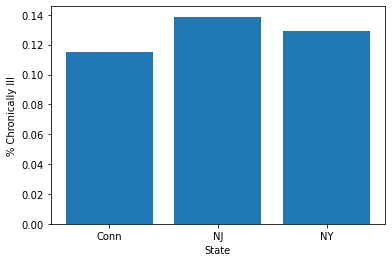

In [282]:
fig, ax = plt.subplots()
x = ['Conn', 'NJ', 'NY']
y = df.groupby(['_STATE'])['Chronic'].mean().values
plt.bar(x,y)
ax.set_xlabel('State')
ax.set_ylabel('% Chronically Ill')

In [283]:
# create graphic to compare chronically sick by state


## 6. Independent Variables (categorical)

Does smoking affect the number of days people feel physically ill? 
Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`. When cleaning this data you will find that many respondents were not asked that question. read the codebook to understand why, and use that information when cleaning up your data. I.E, you will need to process two columns in order to create a new column of smokers.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [284]:
df.dropna(axis=0,subset=['SMOKDAY2'], inplace=True)
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,Chronic
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,1.0,1.0,0.0,88.0,NaN,1.0,1.0,2.0,1.0,3.0,NaN,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,5.0,1.0,NaN,NaN,NaN,2.0,1.0,88.0,8.0,1.0,164.0,504.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,NaN,7.0,3.0,2.0,NaN,101.0,1.0,88.0,2.0,103.0,555.0,327.0,555.0,302.0,102.0,1.0,64.0,105.0,30.0,67.0,103.0,14.0,104.0,1.0,1.0,102016.0,2.0,1.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [285]:
df['smoking'] = np.where(df['SMOKE100']==2, 3, df['SMOKDAY2'])
df['smoking'] = np.where(df['SMOKE100']==7, 7, df['smoking'])
df['smoking'] = np.where(df['SMOKE100']==9, 9, df['smoking'])
df['smoking'].describe()



count    13783.000000
mean         2.525720
std          0.853626
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          9.000000
Name: smoking, dtype: float64

In [286]:
df['smoking'].describe()

count    13783.000000
mean         2.525720
std          0.853626
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          9.000000
Name: smoking, dtype: float64

In [287]:
smoking_avg = df['smoking'].value_counts()/df['smoking'].count()
smoking_avg

3.0    0.703983
1.0    0.194152
2.0    0.099470
9.0    0.001959
7.0    0.000435
Name: smoking, dtype: float64

Text(0, 0.5, '# of observations')

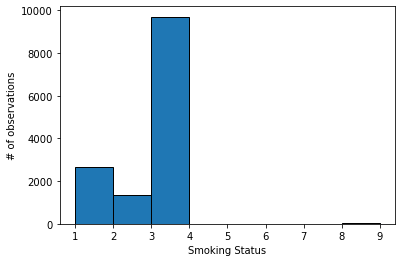

In [288]:
#histogram:

fig, ax = plt.subplots()
plt.hist(df['smoking'], bins=8, edgecolor='black')
ax.set_xlabel('Smoking Status')
ax.set_ylabel('# of observations')


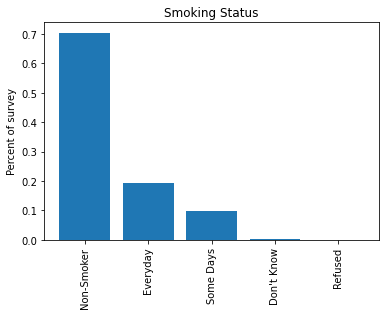

In [289]:
# code to graph those proportion of differen smoking groups using matplotlib
# code to graph those averages using matplotlib
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], smoking_avg)

# Set title and lables
ax.set_xticklabels(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], rotation=90)
ax.set_ylabel("Percent of survey")
ax.set_title('Smoking Status')

plt.show()

In [290]:
df['_STATE'] = df['_STATE'].replace([36],'NY')
df['_STATE'] = df['_STATE'].replace([34],'NJ')
df['_STATE'] = df['_STATE'].replace([9],'CT')

df['_STATE']

49942     CT
49944     CT
49946     CT
49951     CT
49954     CT
          ..
303768    NY
303769    NY
303773    NY
303774    NY
303776    NY
Name: _STATE, Length: 13783, dtype: object

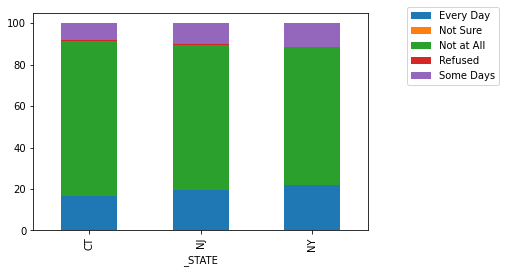

In [291]:
#graph showing the breakdown of smokers per state

df._STATE.replace([9,34,36],['Conn','NJ','NY'],inplace=True)
df.SMOKDAY2.replace([1,2,3,7,9],['Every Day','Some Days','Not at All','Not Sure','Refused'],inplace=True)

x = df.groupby('_STATE')['SMOKDAY2'].value_counts(normalize=True).unstack() * 100
fig,ax = plt.subplots()
x.plot.bar(stacked=True,ax=ax,)
ax.legend(bbox_to_anchor=(1.1, 1.05))

In [292]:
# #without normalization:

# every = df.where(df['smoking']==1)
# every = every.groupby(every['_STATE']).count()
# some = df.where(df['smoking']==2)
# some = some.groupby(some['_STATE']).count()
# none = df.where(df['smoking']==3)
# none = none.groupby(none['_STATE']).count()
# dontknow = df.where(df['smoking']==7)
# dontknow = dontknow.groupby(dontknow['_STATE']).count()
# refused = df.where(df['smoking']==9)
# refused = refused.groupby(refused['_STATE']).count()
# x = ['CT','NJ','NY']
# fig, ax = plt.subplots()
# plt.bar(x, every['smoking'], label = 'Every day', edgecolor = 'blue', facecolor='None')
# plt.bar(x, some['smoking'], label = 'Some days', edgecolor = 'orange', facecolor='None')
# plt.bar(x, none['smoking'], label = 'Not at all', edgecolor = 'green', facecolor='None')
# plt.bar(x, dontknow['smoking'], label = 'Dont know', edgecolor = 'red', facecolor='None')
# plt.bar(x, refused['smoking'], label = 'Refused', edgecolor = 'purple', facecolor='None')
# ax.set_xlabel('State')
# ax.set_ylabel('# of observations')
# # ax.legend(loc = 'best')
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [293]:
df['smoking'] = df['smoking'].replace([1],'Every day')
df['smoking'] = df['smoking'].replace([2],'Some days')
df['smoking'] = df['smoking'].replace([3],'Not at all')
df['smoking'] = df['smoking'].replace([7],'Dont know')
df['smoking'] = df['smoking'].replace([9],'Refused')

df['smoking']

49942     Not at all
49944     Not at all
49946     Not at all
49951     Not at all
49954     Not at all
             ...    
303768    Not at all
303769    Not at all
303773    Not at all
303774     Every day
303776    Not at all
Name: smoking, Length: 13783, dtype: object

In [294]:
df.groupby('smoking').mean()['PHYSHLTH']

smoking
Dont know     2.500000
Every day     6.566517
Not at all    4.587550
Refused       7.148148
Some days     6.246535
Name: PHYSHLTH, dtype: float64

In [295]:
# code to graph these average sick days for each category of smoking status
cat_avg = df.groupby('smoking')['PHYSHLTH'].mean()
cat_std = df.groupby('smoking')['PHYSHLTH'].std()
cat_avg

smoking
Dont know     2.500000
Every day     6.566517
Not at all    4.587550
Refused       7.148148
Some days     6.246535
Name: PHYSHLTH, dtype: float64

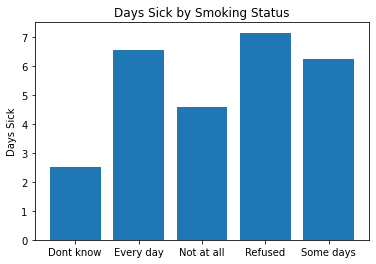

In [296]:

# code to graph those averages using matplotlib
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(['Dont know', 'Every day', 'Not at all','Refused', 'Some days'], cat_avg)

# Set title and lables
# ax.set_xticklabels(['Everyday', 'Non-Smoker',  'Some Days',"Don't Know", "Refused"], rotation=90)
ax.set_ylabel("Days Sick")
ax.set_title('Days Sick by Smoking Status')

plt.show()

## 7. Independent Variables (continuous):

Does the amount of days a person drinks affect the number of days they feel physically ill?
To investigate this, let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [297]:
# code here to clean up the ALCDAY5 responses
df['ALCDAY5'] = df['ALCDAY5'].replace([101],1*4.34524)
df['ALCDAY5'] = df['ALCDAY5'].replace([102],2*4.34524)
df['ALCDAY5'] = df['ALCDAY5'].replace([103],3*4.34524)
df['ALCDAY5'] = df['ALCDAY5'].replace([104],4*4.34524)
df['ALCDAY5'] = df['ALCDAY5'].replace([105],5*4.34524)
df['ALCDAY5'] = df['ALCDAY5'].replace([106],6*4.34524)
df['ALCDAY5'] = df['ALCDAY5'].replace([107],7*4.34524)

for num in range(199,231):
    df['ALCDAY5'] = df['ALCDAY5'].replace([num],num-200)

    
df['ALCDAY5']




49942       4.34524
49944      30.00000
49946     888.00000
49951     888.00000
49954       2.00000
            ...    
303768      1.00000
303769      8.69048
303773      8.00000
303774      3.00000
303776      4.00000
Name: ALCDAY5, Length: 13783, dtype: float64

In [298]:
df['ALCDAY5'] = df['ALCDAY5'].replace([777],None)
df['ALCDAY5'] = df['ALCDAY5'].replace([888],0)
df['ALCDAY5'] = df['ALCDAY5'].replace([999],None)

df.dropna(axis=0,subset=['ALCDAY5'], inplace=True)


In [299]:
df['ALCDAY5']

49942      4.34524
49944     30.00000
49946      0.00000
49951      0.00000
49954      2.00000
            ...   
303768     1.00000
303769     8.69048
303773     8.00000
303774     3.00000
303776     4.00000
Name: ALCDAY5, Length: 13605, dtype: float64

In [300]:
#descriptive statistics of cleaned data

df['ALCDAY5'].describe()

count    13605.000000
mean         6.627643
std          9.495983
min          0.000000
25%          0.000000
50%          2.000000
75%          8.690480
max         30.416680
Name: ALCDAY5, dtype: float64

Text(0, 0.5, '# of observations')

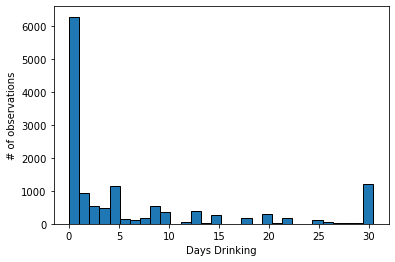

In [301]:
# graphic showing the histogram of data

fig, ax = plt.subplots()
plt.hist(df['ALCDAY5'], bins=30, edgecolor='black')
ax.set_xlabel('Days Drinking')
ax.set_ylabel('# of observations')

In [302]:
# code to calculate averages per state
df.groupby(df['_STATE'])['ALCDAY5'].mean()


_STATE
CT    7.251810
NJ    6.169548
NY    6.524361
Name: ALCDAY5, dtype: float64

In [303]:
# Code to calculate correlation of between number of drinks of number of days physically ill
df[['PHYSHLTH', 'ALCDAY5']].corr()['PHYSHLTH']



PHYSHLTH    1.000000
ALCDAY5    -0.114873
Name: PHYSHLTH, dtype: float64

## 8. Statistical Inference


- Create a 95% confidence interval for the population mean of physically ill days.

In [304]:
print(df['PHYSHLTH'].mean())
print(len(df['PHYSHLTH']))

5.146857772877619
13605


In [305]:
df['PHYSHLTH'].count()

13605

In [306]:
import scipy.stats as stats

In [307]:
n = len(df['PHYSHLTH'])
x_bar = df['PHYSHLTH'].mean()
s = df['PHYSHLTH'].std()

stats.t.interval(alpha = 0.95,
                 df = n-1,
                 loc = x_bar,
                 scale = s/math.sqrt(n))



(4.986831708044339, 5.306883837710898)

In [308]:
s

9.522550103060613

In [309]:
x_bar = np.mean(df['PHYSHLTH']) # mean of vector
s = np.std(df['PHYSHLTH']) # std of vector
n = len(df['PHYSHLTH']) # number of obs
z = 1.96 # for a 95% CI
lower = x_bar - (z * (s/math.sqrt(n)))
upper = x_bar + (z * (s/math.sqrt(n)))
med = np.median(df['PHYSHLTH'])
print(lower, upper)
print(s)

4.986848886272675 5.306866659482562
9.522200131539407


^^Qe are 95% confident that the population has a mean sick day number between 4.99 and 5.31 days per month

-  Create a 95% confidence interval for the true proportion of chronically sick people.

In [310]:
# n = len(df['Chronic'])
# p_bar = df['Chronic'].mean()
# s = np.std(df['Chronic'], ddof = 1)

# stats.t.interval(alpha = 0.95,
#                  df = n-1,
#                  loc = p_bar,
#                  scale = s)

# #NOPE

In [311]:
samp_prop = df['Chronic'].mean()

MoE = 1.96*math.sqrt((samp_prop*(1-samp_prop))/len(df['Chronic']))

lower = samp_prop - MoE
upper = samp_prop + MoE

print(lower, upper)

0.16123687242493862 0.17378701585143036


^^We are 95% confident that the proportion of chronically ill because in the population is between 16.12% and 17.38%

## 9. Hypothesis Tests 

**For the follwing questions that require hypothesis tests, you must complete the following:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic agains the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

### The following questions are regarding the `PHYSHLTH` variable. 
- What is the probability of getting this sample mean for days physically ill, if the population mean is 4?
- Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 


### Q1. What is the probability of getting this sample mean for days physically ill, if the population mean is 4?
1. Null Hypothesis: population mean = 4, Alternative hypothesis: population mean does not = 4
2. T-test (mean, n>=30, population std not known)

In [312]:
#3. Critical value:
n = len(df['PHYSHLTH'])
dof = n-1
dof

#With this df, critical value is 1.96


13604

In [313]:
#check:
import scipy.stats as scs
t_crit = scs.t.ppf(0.975,dof)
t_crit

1.9601383802118966

In [314]:
#4. Evaluate the test statistic against the critical value:

x_bar = df['PHYSHLTH'].mean()
s = np.std(df['PHYSHLTH'])
mu = 4

t = (x_bar - mu)/(s/math.sqrt(n))
t

#s/sqrt(n) = standard error

14.04822746120327

5. Our test statistic (14.05) is significantly higher than our critical value (1.96). This means that our sample mean is 14.05 standard deviations away from the null hypothesis's mean. We therefore can reject the null hypothesis. We are at least 95% confident that the null hypothesis is incorrect. 

The probability of getting this sample mean for days physically ill, if the population mean is 4 is our p-value, which is very close to 0% (off the chart).

### Q2. Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?


1. Null Hypothesis: mu(Men) = mu(Women) in terms of days ill, Alternative Hypothesis: mu(Men) does not = mu(Women) in terms of days ill
2. T-test (mean, n>=30, population std not known)

In [315]:
df['SEX'].value_counts()

2.0    7110
1.0    6492
9.0       3
Name: SEX, dtype: int64

In [316]:
#clean up SEX column:
df['SEX'] = df['SEX'].replace([9],None)
df.dropna(axis=0,subset=['SEX'], inplace=True)
df['SEX'].value_counts()

2.0    7112
1.0    6493
Name: SEX, dtype: int64

In [317]:
df['SEX'] = df['SEX'].replace([1,2],['M','F'])
df['SEX'].value_counts()

F    7112
M    6493
Name: SEX, dtype: int64

In [318]:
df['SEX'].value_counts()[0]

7112

In [319]:
df.groupby(['SEX'])['PHYSHLTH'].mean()

SEX
F    5.471738
M    4.791006
Name: PHYSHLTH, dtype: float64

In [320]:
df.groupby(['SEX'])['PHYSHLTH'].std()

SEX
F    9.701249
M    9.310630
Name: PHYSHLTH, dtype: float64

In [321]:
x_bar = np.mean(df['PHYSHLTH'].loc[df['SEX'] == 'F'])
s = np.std(df['PHYSHLTH'].loc[df['SEX'] == 'F'], ddof = 1)
print(x_bar, s)
x_bar = np.mean(df['PHYSHLTH'].loc[df['SEX'] == 'M'])
s = np.std(df['PHYSHLTH'].loc[df['SEX'] == 'M'], ddof = 1)
print(x_bar, s)

5.47173790776153 9.701249104584896
4.791005698444478 9.310629966092609


In [322]:
df[df['SEX']=='M']

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,Chronic,smoking
49951,CT,1.0,1302017,1,30,2017,1100.0,2017000014,2.017000e+09,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,88.0,NaN,1.0,2.0,2.0,1.0,3.0,NaN,4.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,1.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,M,2.0,6.0,1.0,2.0,NaN,1.0,2.0,7.0,88.0,7.0,1.0,133.0,505.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,Not at All,NaN,7.0,3.0,2.0,NaN,0.00000,NaN,NaN,NaN,101.0,301.0,315.0,302.0,302.0,207.0,1.0,64.0,105.0,45.0,61.0,101.0,100.0,107.0,1.0,1.0,112016.0,1.0,1.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [323]:
#3. Critical value:
n1 = df['SEX'].value_counts()[0]
n2 = df['SEX'].value_counts()[1]

dof = n1+n2-2
print(dof)

#Based on t-table with this value for degrees of freedom, critical value is still 1.96


13603


In [324]:
#4. Evaluate the test statistic against the critical value:

# def sample_var(sample):
#     x_bar = np.mean(sample)
#     return np.sum((sample-x_bar)**2)/(len(sample)-1)

In [325]:
# def pooled_variance(sample1,sample2):
#     n1=len(sample1)
#     n2=len(sample2)
#     numerator = (n1-1)*sample_var(sample1)+(n2-1)*sample_var(sample2)
#     denominator = n1+n2-2
#     return numerator/denominator

In [326]:
# def twosample_tstat(sample1,sample2):
#     numerator = np.mean(sample1)-np.mean(sample2)
#     n1=len(sample1)
#     n2=len(sample2)
#     denominator = math.sqrt(pooled_variance(sample1,sample2)*((1/n1)+(1/n2)))
#     return numerator/denominator

In [327]:
sample1 = df['PHYSHLTH'].loc[df['SEX'] == 'F']
sample2 = df['PHYSHLTH'].loc[df['SEX'] == 'M']

# twosample_tstat(sample1,sample2)


In [328]:
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
t, p = ttest_ind(sample1, sample2, equal_var=True)
print(t)
print(p)

#.5-2 ratio count as true


4.16728706305622
3.1015194155680764e-05


5. The magnitude of our test statistic (-13.37) is  higher than our critical value (1.96). We therefore can reject the null hypothesis. We are 95% confident that we can reject the null hypothesis that women's and men's average sick days are equal.


## Q3. Perform a statistical test to determine if there is statistically significant difference in physical health of people from the three states. 

1. Null Hypothesis: mu(CT) = mu(NJ) = mu(NY) regarding days physically ill. Alternative Hypothesis: At least one of mu(CT), mu(NJ), and mu(NY) is different from the others regarding days physically ill.
2. ANOVA

In [329]:
#3. Critical value:
CT = df['PHYSHLTH'][df['_STATE'] == 'CT']
NJ = df['PHYSHLTH'][df['_STATE'] == 'NJ']
NY = df['PHYSHLTH'][df['_STATE'] == 'NY']
len_CT = len(CT)
len_NJ = len(NJ)
len_NY = len(NY)
n = len_CT + len_NJ + len_NY
k=3
SSb = n*sum(np.mean())
MSb = SSb/DFb
MSw = SSw/DFw
F = MSb/MSw

TypeError: _mean_dispatcher() missing 1 required positional argument: 'a'

In [330]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
ols('_STATE', data = df).fit()


PatsyError: model is missing required outcome variables

In [331]:
#4. Evaluate the test statistic against the critical value:
stats.f_oneway(df['PHYSHLTH'][df['_STATE'] == 'CT'],
                df['PHYSHLTH'][df['_STATE'] == 'NJ'], 
                df['PHYSHLTH'][df['_STATE'] == 'NY'])





F_onewayResult(statistic=7.480150136108788, pvalue=0.0005664965374883285)

5. According to our p-value, there is a .06% chance that these sample means could be obtained from a population in which the means were equal. With our 95% confidence interval, we can therefore reject the null hypothesis.

### The following questions are regarding the  `CHRONIC` variable.
- What is the probability of drawing this sample proportion if chronically true population proportion is 0.10?
- Is there a statistically significant difference in the percentage of men and women who are chronically sick?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states.

### Q1. What is the probability of drawing this sample proportion if chronically true population proportion is 0.10?
1. Null Hypothesis: population proportion = 0.10, Alternative hypothesis: population proportion does not = 0.10
2. Z-test (proportion)

In [332]:
# Critical Value
1.96

1.96

In [333]:
df['Chronic'].mean()

0.1675119441381845

In [334]:
#4. Evaluate the test statistic against the critical value:
Pe = 0.10
Po = df['Chronic'].mean()
q = 1-Po
n = len(df['Chronic'])
z_score = (Po - Pe)/math.sqrt((Po*q)/n)
z_score


#hypothesis test lecture, last slide

21.08715510478133

5. Our test statistic (21.08) is significantly higher than our critical value (1.96). This means that our sample mean is 21.08 standard deviations away from the null hypothesis's mean. We therefore can reject the null hypothesis. We are at least 95% confident that the null hypothesis is incorrect. 

The probability of drawing this sample proportion if chronically true population proportion is 0.10 is our p-value, which is very close to 0% (off the chart).

## Q2. Is there a statistically significant difference in the percentage of men and women who are chronically sick?


1. Null Hypothesis: p(Men) = p(Women) in terms of chronically ill proportions, Alternative Hypothesis: p(Men) does not = p(Women) in terms of chronically ill proportions
2. Z-test

In [335]:
# Critical value

1.96

1.96

In [338]:
#4. Evaluate the test statistic against the critical value:
sample1 = df['Chronic'].loc[df['SEX'] == 'F']
sample2 = df['Chronic'].loc[df['SEX'] == 'M']

x1 = sum(sample1)
x2 = sum(sample2)
n1 = len(sample1)
n2 = len(sample2)
p_star = (x1+x2)/(n1+n2)
p1 = sample1.mean()
p2 = sample2.mean()
z_star = (p1-p2)/math.sqrt(p_star*(1-p_star)*((1/n1)+(1/n2)))
z_star


3.753201395156138

5. Our test statistic (3.75) is  higher than our critical value (1.96). We therefore can reject the null hypothesis. We are 95% confident that we can reject the null hypothesis that the average number of chronically ill men and chronically ill women are equal.

## Q3. Perform a statistical test to determine if there is a statistically significant difference in physical health of people from the three states.

1. Null Hypothesis: p(CT) = p(NJ) = p(NY) regarding chronically ill proportions. Alternative Hypothesis: At least one of p(CT), p(NJ), and p(NY) is different from the others regarding days physically ill.
2. Chi-Squared

In [129]:
CT_nonchronic = df['Chronic'].loc[df['_STATE'] == 'CT'].loc[df['Chronic']==0]
CT_chronic = df['Chronic'].loc[df['_STATE'] == 'CT'].loc[df['Chronic']==1]
NJ_nonchronic = df['Chronic'].loc[df['_STATE'] == 'NJ'].loc[df['Chronic']==0]
NJ_chronic = df['Chronic'].loc[df['_STATE'] == 'NJ'].loc[df['Chronic']==1]
NY_nonchronic = df['Chronic'].loc[df['_STATE'] == 'NY'].loc[df['Chronic']==0]
NY_chronic = df['Chronic'].loc[df['_STATE'] == 'NY'].loc[df['Chronic']==1]

In [131]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

table = [[len(CT_nonchronic), len(CT_chronic)],
        [len(NJ_nonchronic), len(NJ_chronic)],
        [len(NY_nonchronic), len(NY_chronic)]]
print(table)

[[3582, 644], [3857, 847], [3887, 788]]


In [140]:
stat, p, dof, expected = chi2_contingency(table)


In [141]:
#3. Critical value:
critical = chi2.ppf(0.95, dof)
critical

5.991464547107979

In [142]:
#4. Test statistic:
stat

12.277230897609174

In [144]:
p

0.0021579092867978406

5. According to our p-value, there is a .2% chance that these sample proportions could be obtained from a population in which the proportions were equal. With our 95% confidence interval, we can therefore reject the null hypothesis.

# 10. Independent Investigation

Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 

Select a continuous dependent varaible and a binary dependent variable that you would like to investigate. Then select a categorical independent variable with at least 3 groups and for which you will test to see if the response to the independent variable affects outcomes of the dependent variable.

For your continuous dependent variable perform the following:
  - Determine the sample mean and sample standard deviation
  - Create a confidence interval for a population mean.
  - Perform a two-sample test of means for gender.
  - Perform a one-way ANOVA using your categorical independent variable.

Select/create a binary variable from the survey questions as you dependent variable and perform the following:
  - Create a confidence interval for a population proportion.
  - Perform a two proportions z-test using gender.
  - Perform a Chi-Square test using your categorical independent variable.

In [145]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,Chronic,smoking
49942,CT,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,1.0,1.0,0.0,88.0,NaN,1.0,1.0,2.0,1.0,3.0,NaN,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,F,2.0,5.0,1.0,NaN,NaN,NaN,2.0,1.0,88.0,8.0,1.0,164.0,504.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,Not at All,NaN,7.0,3.0,2.0,NaN,4.34524,1.0,88.0,2.0,103.0,555.0,327.0,555.0,302.0,102.0,1.0,64.0,105.0,30.0,67.0,103.0,14.0,104.0,1.0,1.0,102016.0,2.0,1.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Continuous dependent variable: MENTHLTH
Binary dependent variable: CVDINFR4
Categorial independent variable: GENHLTH

In [150]:
#clean MENTHLTH data:
df = pd.read_csv('case_study.csv', index_col=0)
df['MENTHLTH'] = df['MENTHLTH'].replace([88,77,99],[0,None,None])
df.dropna(axis=0,subset=['MENTHLTH'], inplace=True)
df['MENTHLTH'].head()

49938    2.0
49939    0.0
49940    0.0
49941    0.0
49942    0.0
Name: MENTHLTH, dtype: float64

In [152]:
#For MENTHLTH:
#Determine the sample mean and sample standard deviation

x_bar = df['MENTHLTH'].mean()
s = df['MENTHLTH'].std()
print(x_bar)
print(s)

3.4640033046146583
7.755965406145017


In [157]:
#Create a confidence interval for a population mean.

#at 95% confidence:
n = len(df['MENTHLTH'])
margin_of_error = 1.96*(s/math.sqrt(n))
interval_min = round((x_bar - margin_of_error), 3)
interval_max = round((x_bar + margin_of_error), 3)
print("We are 95% confident that the population mean is between " + str(interval_min) + " and " + str(interval_max) + ".")

We are 95% confident that the population mean is between 3.381 and 3.547.


In [158]:
#clean up SEX column:
df['SEX'] = df['SEX'].replace([1,2],['M','F'])
df['SEX'] = df['SEX'].replace([9],None)
df.dropna(axis=0,subset=['SEX'], inplace=True)
df['SEX'].value_counts()

F    18986
M    14906
Name: SEX, dtype: int64

In [160]:
#Perform a two-sample test of means for gender.
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
sample1 = df['MENTHLTH'].loc[df['SEX'] == 'F']
sample2 = df['MENTHLTH'].loc[df['SEX'] == 'M']
t, p = ttest_ind(sample1, sample2, equal_var=False)
print(t)
print(p)

10.397485168659536
2.7833814372507793e-25


^^This tells us that the mean numbers of days that men and women have reported poor mental health in the past 30 days are not equal

In [162]:
#Clean up GENHLTH data:
df['GENHLTH'] = df['GENHLTH'].replace([7,9],[None,None])
df.dropna(axis=0,subset=['GENHLTH'], inplace=True)
df['GENHLTH'].head()

49938    3.0
49939    4.0
49940    2.0
49941    1.0
49942    1.0
Name: GENHLTH, dtype: float64

In [163]:
df['GENHLTH'] = df['GENHLTH'].replace([1,2,3,4,5],['Excellent', 'Very good', 'Good', 'Fair', 'Poor'])
df['GENHLTH'].head()


49938         Good
49939         Fair
49940    Very good
49941    Excellent
49942    Excellent
Name: GENHLTH, dtype: object

In [167]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [169]:
#Perform a one-way ANOVA using your categorical independent variable.
stats.f_oneway(df['MENTHLTH'][df['GENHLTH'] == 'Excellent'],
               df['MENTHLTH'][df['GENHLTH'] == 'Very good'], 
               df['MENTHLTH'][df['GENHLTH'] == 'Good'],
               df['MENTHLTH'][df['GENHLTH'] == 'Fair'],
               df['MENTHLTH'][df['GENHLTH'] == 'Poor'])

F_onewayResult(statistic=919.3662755263065, pvalue=0.0)

^^Since the F statistic is so large and p value so small, we know that we reject the null hypothesis that these categories of general health have equal mental health means.

In [170]:
#Clean up CVDINFR4 data:
df['HrtAtt'] = df['CVDINFR4']
df['HrtAtt'] = df['HrtAtt'].replace([2,7,9],[0,None,None])
df.dropna(axis=0,subset=['HrtAtt'], inplace=True)

In [172]:
df['HrtAtt'].head()

49938    0.0
49939    0.0
49940    0.0
49941    0.0
49942    0.0
Name: HrtAtt, dtype: float64

In [177]:
#Create a confidence interval for a population proportion.
n = len(df['HrtAtt'])
x_bar = df['HrtAtt'].mean()
s = df['HrtAtt'].std() 
margin_of_error = 1.96*(s/math.sqrt(n))
interval_min = round((x_bar - margin_of_error), 3)
interval_max = round((x_bar + margin_of_error), 3)
print("We are 95% confident that the proportion of the population that has been diagnosed with a heart attack is between " + str(interval_min*100) + "% and " + str(interval_max*100) + "%.")

We are 95% confident that the proportion of the population that has been diagnosed with a heart attack is between 4.8% and 5.2%.


In [178]:
#Perform a two proportions z-test using gender.
sample1 = df['HrtAtt'].loc[df['SEX'] == 'F']
sample2 = df['HrtAtt'].loc[df['SEX'] == 'M']

#Use t test in scipy because n is so large that they will be the same:
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
z, p = ttest_ind(sample1, sample2, equal_var=False)
print(z)
print(p)

-12.908651678134047
5.24320399359235e-38


^^Large magnitude of Z statistic and low p value tell us that we reject the null hypothesis that males and females have the same proportion of heart attacks

In [179]:
#Perform a Chi-Square test using your categorical independent variable.
ex_noHA = df['HrtAtt'].loc[df['GENHLTH'] == 'Excellent'].loc[df['HrtAtt']==0]
ex_HA = df['HrtAtt'].loc[df['GENHLTH'] == 'Excellent'].loc[df['HrtAtt']==1]
vg_noHA = df['HrtAtt'].loc[df['GENHLTH'] == 'Very good'].loc[df['HrtAtt']==0]
vg_HA = df['HrtAtt'].loc[df['GENHLTH'] == 'Very good'].loc[df['HrtAtt']==1]
g_noHA = df['HrtAtt'].loc[df['GENHLTH'] == 'Good'].loc[df['HrtAtt']==0]
g_HA = df['HrtAtt'].loc[df['GENHLTH'] == 'Good'].loc[df['HrtAtt']==1]
f_noHA = df['HrtAtt'].loc[df['GENHLTH'] == 'Fair'].loc[df['HrtAtt']==0]
f_HA = df['HrtAtt'].loc[df['GENHLTH'] == 'Fair'].loc[df['HrtAtt']==1]
p_noHA = df['HrtAtt'].loc[df['GENHLTH'] == 'Poor'].loc[df['HrtAtt']==0]
p_HA = df['HrtAtt'].loc[df['GENHLTH'] == 'Poor'].loc[df['HrtAtt']==1]

In [180]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

table = [[len(ex_noHA), len(ex_HA)],
        [len(vg_noHA), len(vg_HA)],
        [len(g_noHA), len(g_HA)],
        [len(f_noHA), len(f_HA)],
        [len(p_noHA), len(p_HA)]]
print(table)

[[6342, 69], [11043, 271], [9588, 543], [3790, 499], [1204, 298]]


In [182]:
stat, p, dof, expected = chi2_contingency(table)
print(stat)
print(p)

1467.9285723401877
0.0


^^Our test statistic is very high and our p value is very low, which tells us that we reject the null hypothesis that different "general health" levels will have equal proportions of heart attack diagnoses.